<a href="https://colab.research.google.com/github/Minseo-202103621/machinelearning_deeplearning/blob/main/CH06_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주성분 분석
## 차원 축소에 대해 이해하고 대표적인 차원 축소 알고리즘 중 하나인 PCA(주성분 분석) 모델을 만들어 보자.

너무 많은 사진업로드로 인해 저장 공간이 부족해졌다. 나중에 군집이나 분류에 영향을 끼치지 않으면서 업로드된 사진의 용량을 줄일 수 있을까?


---
# 차원과 차원 축소
데이터가 가진 속성은 특성이다라고 배웠고. 그래서 과일 사진의 경우 10,000개의 픽셀이 있기 때문에 10,000개의 특성이 있는 셈이다.

머신러닝에서는 이런 특성을 차원이라고도 부른다. 10,000개의 특성은 결국 10,000개의 차원을 의미하고 이 차원을 줄일 수 있다면 저장 공간을 크게 절약할 수 있다.


** 2차원 배열과 1차원 배열에서 차원이란 용어는  좀 다르게 쓰인다. 2차원 배열일 때는 행과 열이 차원이 되고, 1차원 배열 즉 벡터일 경우에는 원소의 개수를 말한다.

차원 축소를 위해 비지도 학습 작업 중 하나인 ***차원 축소*** 알고리즘을 다루겠다.

차원 축소는 데이터를 가장 잘 나타내는 일부 특성을 선택하여 데이터 크기를 줄이고 지도 학습 모델의 성능을 향상시킬 수 있는 방법이다.

또한 줄어든 차원에서 다시 원본 차원으로 손실을 최대한 줄이면서 복원할 수도 있다.

이 절에서는 대표적인 차원 축소 알고리즘인 ***주성분 분석***을 배우겠다. 

주성분 분석을 간단히 ***PCA***라고도 부른다.


---

# 주성분 분석 소개

주성분 분석은 데이터에 있는 분산이 큰 방향을 찾는 것으로 이해할 수 있다.

분산은 데이터가 널리 퍼져있는 정도를 말한다.

분산이 큰 방향이란 데이터를 잘 표현하는 어떤 벡터라고 생각할 수 있다.

예를 우 상향 하는 그래프가 있다고 생각해보자. 2차원 데이터를 생각해 볼거다. 이 직선이 원점에서 출발한다면 두 원소로 이루언지 벡터로 쓸 수 있다. 예를 들어 (2,1) 처럼 표현할 수 있다.

이 벡터를 ***주성분***이라고 한다. 이 주성분 벡터는 원본 데이터에 있는 어떤 방향이다. 따라서 주성분 벡터의 원소 개수는 원본 데이터셋에 있는 특성 개수와 같다.

하지만 원본 데이터는 주성분을 사용해 차원을 줄일 수 있다. 예를 들어 샘플 데이터 s(4,2)를 주성분에 직각으로 투영하면 1차원 데이터 p(4.5)를 만들 수 있다.

주성분은 원본 차원과 같고 주성분으로 바꾼 데이터는 차원이 줄어든다는 점을 꼭 기억해라.

첫번 째 주성분을 찾은 다음 이 벡터에 수직이고 분산이 가장 큰 다음 방향을 찾는다. 이 벡터가 두 번째 주성분이다.

일반적으로 주성분은 원본 특성의 개수만큼 찾는다. 2차원 예이니까 두번 째 주성분은 하나이다.

---
# PCA 클래스


In [ ]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1,100*100)


--2023-06-06 08:28:48--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2023-06-06 08:28:48--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2023-06-06 08:28:49--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... c

* 사이킷런은 sklearn.decomposition 모듈 아래 PCA 클래스로 주성분 분석 알고리즘을 제공한다.

* PCA 클래스의 객체를 만들 때 n_components 매개변수에 주성분의 개수를 지정해야 한다. k-평균과 마찬가지로 비지도 학습이기 때문에 fit() 메서드에 타깃값을 제공하지 않는다.


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(fruits_2d)


PCA(n_components=50)

* PCA 클래스가 찾은 주성분은 components_ 속성에 저장되어 있다. 이 배열의 크기를 확인해 보자

In [ ]:
print(pca.components_.shape)

(50, 10000)


n_components = 50 으로 지정했기 때문에 pca.components_ 배열의 첫 번째 차원이 50이다. 즉 50개의 주성분을 찾은 거다. 두 번째 차원은 항상 원본 데이터의 특성 개수와 같은 10,000이다.

* 원본 데이터와 차원이 같으므로 주성분을 100X100 크기의 이미지처럼 출력해 보겠다. 6-2에서 사용한 draw_fruits()함수를 사용해 그림을 그린다.

In [ ]:
import matplotlib.pyplot as plt
def draw_fruits(arr,ratio=1):
  n = len(arr)
  rows = int(np.ceil(n/10))
  cols = n if rows < 2 else 10
  fig,axs = plt.subplots(rows,cols,figsize= (cols*ratio,rows*ratio),squeeze=False)
  for i in range(rows):
    for j in range(cols):
      if i*10 + j < n:

        axs[i,j].imshow(arr[i*10 + j],cmap='gray_r')
      axs[i,j].axis('off')

  plt.show()  


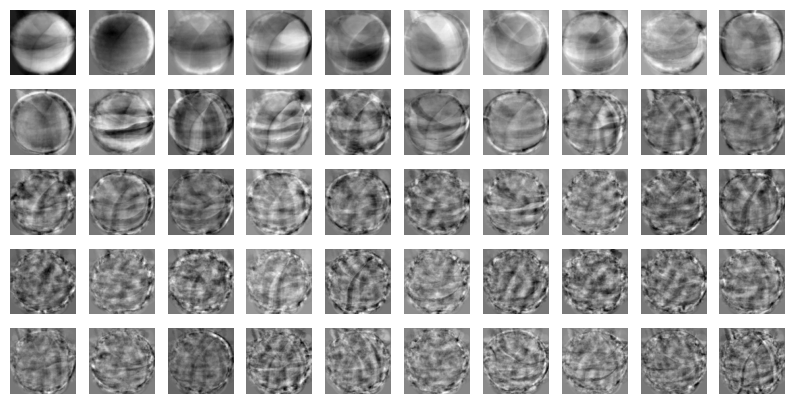

In [ ]:
draw_fruits(pca.components_.reshape(-1,100,100))

이 주성분은 원본 데이터에서 가장 분산이 큰 방향을 순서대로 나타낸 것이다. 한편으로 데이터 셋에 있는 어떤 특징을 잡아낸 것처럼 생각할 수도 있습니다.

주성분을 찾았으므로 원본 데이터를 주성분에 투영하여 특성의 개수를 10,000개에서 50개로 줄일 수 있다.이는 마치 원본 데이터를 각 주성분으로 분해하는 것으로 생각할 수 있다.

* PCA의 transform()메서드를 사용해 원본 데이터의 차원을 50으로 줄여 보겠다.

In [ ]:
print(fruits_2d.shape)

(300, 10000)


In [ ]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


---
# 원본 데이터 재구성

앞에서 10,000개의 특성을 50개로 줄였다. 이로 인해 어느 정도 손실이 발생할 수밖에 없다. 하지만 최대한 분산이 큰 방향으로 데이터를 투영했기 때문에 원본 데이터를 상당 부분 재구성할 수 있다.

PCA 클래스는 이를 위해 inverse_transform() 메서드를 제공한다. 

* 앞서 50개의 차원으로 축소한 fruits_pca데이터를 전달해 10,000개의 특성을 복원하겠다.
 

In [ ]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


* 이제 이 데이터를 100*100 크기로 바꾸어 100개씩 나누어 출력하겠다. 이 데이터는 순서대로 사과,파인애플,바나나를 100개씩 담고 있다.

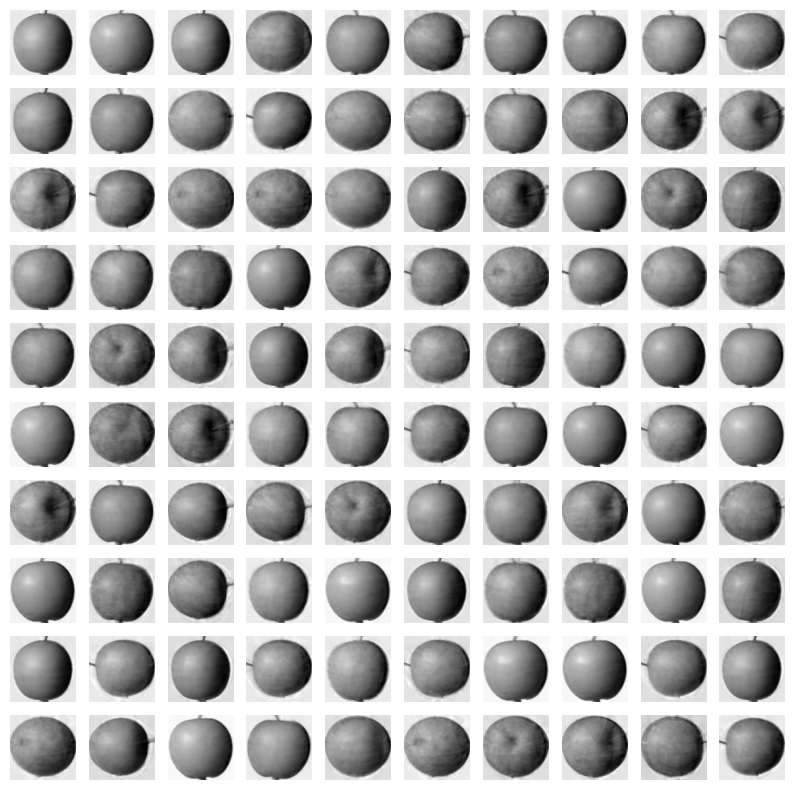

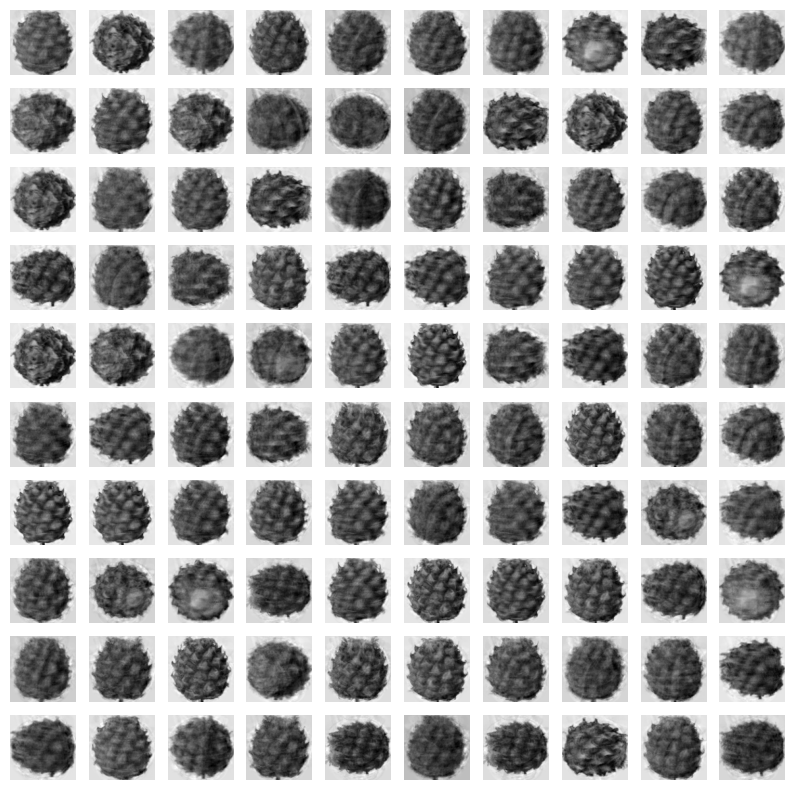

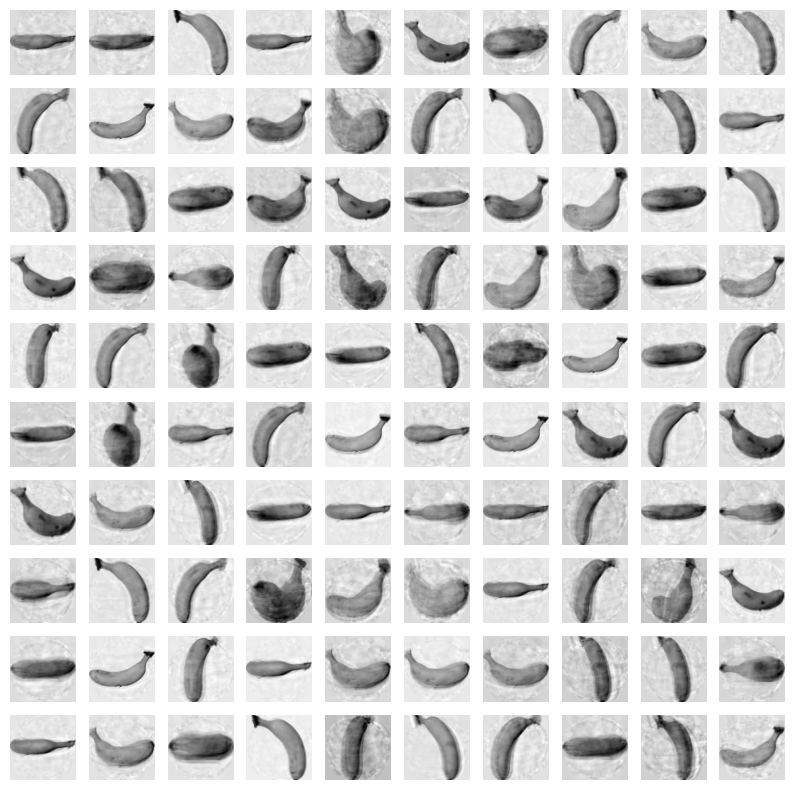

In [ ]:
fruits_reconstruct = fruits_inverse.reshape(-1,100,100)
for start in [0,100,200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print("\n")

대부분 잘 복원됐다. 몇몇 흐리고 번지 부분이 있지만..

만약 주성분을 최대로 사용했다면 완벽하게 원본 데이터를 재구성할 수 있을 것이다. 그럼 50개의 특성은 얼마나 분산을 보존하고 있는 것일까??

---
# 설명된 분산

주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값을 ***설명된 분산***이라고 한다. 

PCA클래스의 explained_variance_ratio_에 각 주성분의 설명된 분산 비율이 기록되어 있다.

당연히 첫 번째 주성분의 설명된 분산이 가장 크다. 이 분산 비율을 모두 더하면 50개의 주성분으로 표현하고 있는 총 분산 비율을 얻을 수 있다.

In [ ]:
print(np.sum(pca.explained_variance_ratio_))

0.921507358189536


92%가 넘는 분산을 유지하고 있다. 앞에서 50개의 특성에서 원본 데이터를 복원했을 때 원본 이미지의 품질이 높았던 이유를 여기에서 찾을 수 있다. 

설명된 분산의 비율을 그래프로 그려 보면 적절한 주성분의 개수를 찾는 데 도움이 된다.

* 맷플롯립의 plot() 함수로 설명된 분산을 그래프로 출력하겠다.

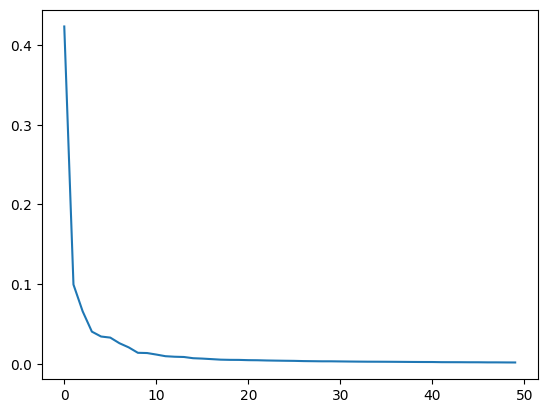

In [ ]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

그래프를 보면 처음 10개의 주성분이 대부분의 분산을 표현하고 있다. 그 다음부터는 각 주성분이 설명하고 있는 분산은 비교적 작다.

####이번에는 PCA로 차원 축소된 데이터를 사용하여 지도 학습 모델을 훈련하겠다. 원본 데이터를 사용했을 때와 어떤 차이가 있는지 확인해 보자.

---
# 다른 알고리즘과 함께 사용하기
과일 사진 원본 데이터와 PCA로 축소한 데이터를 지도 학습에 적용해 보고 어떤 차이가 있는지 알아보자.

3개의 과일 사진을 분류해야 하므로 간단히 로지스틱 회귀 모델을 사용해보겠다.

* 먼저 사이킷런의 LogisticRegression 모델을 만든다


In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()


지도 학습 모델을 사용하려면 타깃값이 있어야 한다. 여기에서는 사과를 0, 파인애플을 1, 바나나를 2로 지정한다.

파이썬 리스트와 정수를 곱하면 리스트 안의 원소를 정수만큼 반복한다.

이를 이용하면 100개의 0 100개의 1 100개의 2로 이루어진 타깃 데이터를 손쉽게 만들 수 있다.

In [ ]:
target = np.array([0]*100 + [1]*100 + [2]*100)

* 먼저 원본 데이터인 fruits_2d를 사용해 보자.

* 로지스틱 회귀 모델에서 성능을 가늠해 보기 위해 cross_validate()로 교차검증을 수행하겠다.

In [ ]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr,fruits_2d,target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
1.7544982433319092


교차 검증의 점수는 0.997 정도로 매우 높다. 특성이 10,000개나 되기 때문에 300개의 샘플에서는 금방 과대적합된 모델을 만들기 쉽다.

cross_validate()함수가 반환하는 딕셔너리에는 fit_time 항목에 각 교차 검증 폴드의 훈련시간이 기록되어 있다.

* 이제 이값을 PCA로 축소한 fruits_pca를 사용했을 때와 비교하겠다,

In [ ]:
scores = cross_validate(lr,fruits_pca,target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))


1.0
0.10259552001953125


50개의 특성만 사용했는데도 정확도가 100%이고 훈련시간은 0.1초로 매우 감소했다.

PCA로 훈련 데이터의 차원을 축소하면 저장 공간뿐만 아니라 머신러닝 모델의 훈련 속도도 높일 수 있다.

앞서 PCA 클래스를 사용할 때 n_components 매개변수에 주성분의 개수를 지정했다. 이 대신 원하는 설명된 분산의 비율을 입력할 수도 있다.

PCA 클래스는 지정된 비율에 도달할 때까지 자동으로 주성분을 찾는다. 

* 설명된 분산의 50%에 달하는 주성분을 찾도록 PCA모델을 만들어 보겠다.

In [ ]:
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

간다하다. 주성분 개수 대신 0~1 사이의 비율을 실수로 입력하면 된다. 몇 개의 주성분을 찾았는지 확인하겠다.

In [ ]:
print(pca.n_components_)

2


단 2개다. 2개의 특성만으로 원본 데이터에 있는 분산의 50%를 표현할 수 있다.

이 모델로 원본 데이터를 변환하겠다. 주성분이 2개이므로 변환된 데이터의 크기는 (300,2)가 될 것이다.


In [ ]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


두 개의 특성만 사용하고도 교차 검증의 결과가 좋을까? 한번 확인해보겠다.


In [ ]:
scores = cross_validate(lr,fruits_pca,target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.033436155319213866


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

2개의 특성을 사용했을 뿐인데 99%의 정확도를 달성했다.

* 차원 축소한 데이터를 사용해 k-평균 알고리즘으로 클러스터를 찾아보겠다.

In [ ]:
from sklearn.cluster import KMeans
km  = KMeans(n_clusters=3,random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_,return_counts=True))


(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


원본 데이터를 사용했을 때와 거의 비슷한 결과이다. 

KMeans가 찾은 레이블을 사용해 과일 이미지를 출력하겠다.



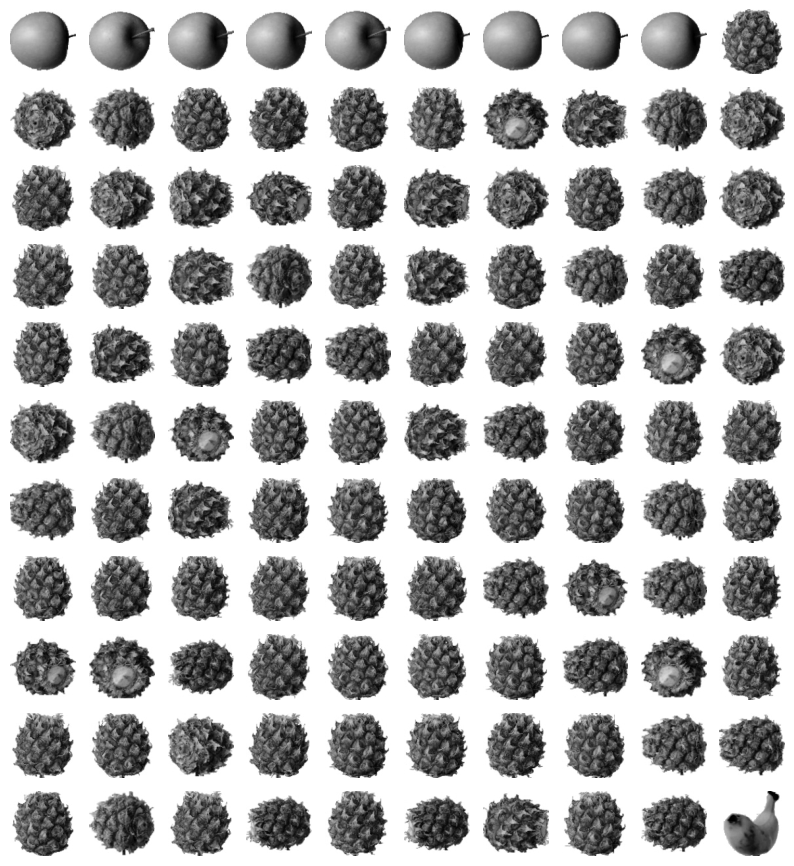

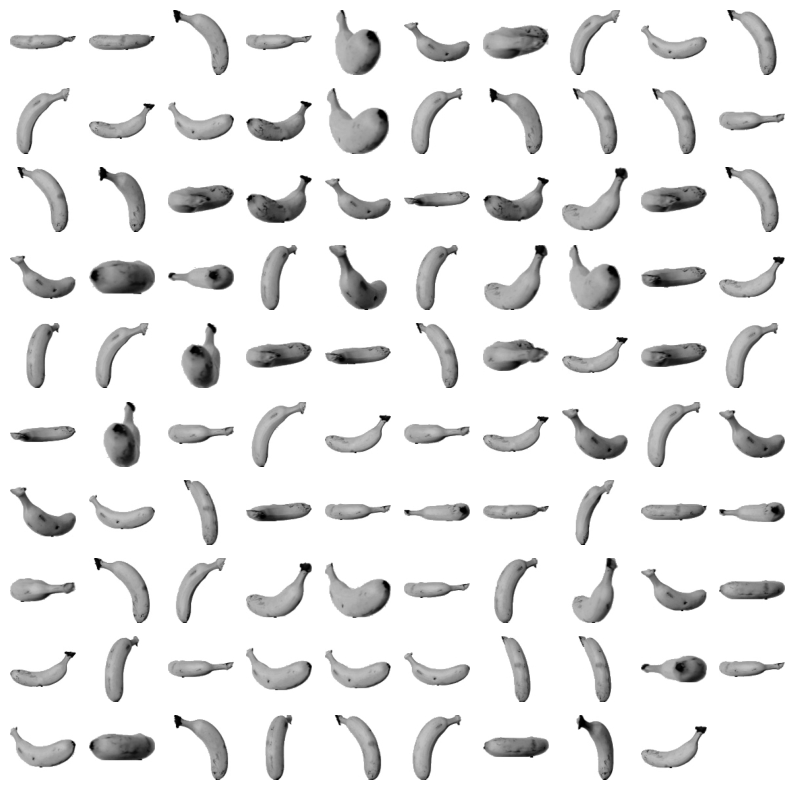

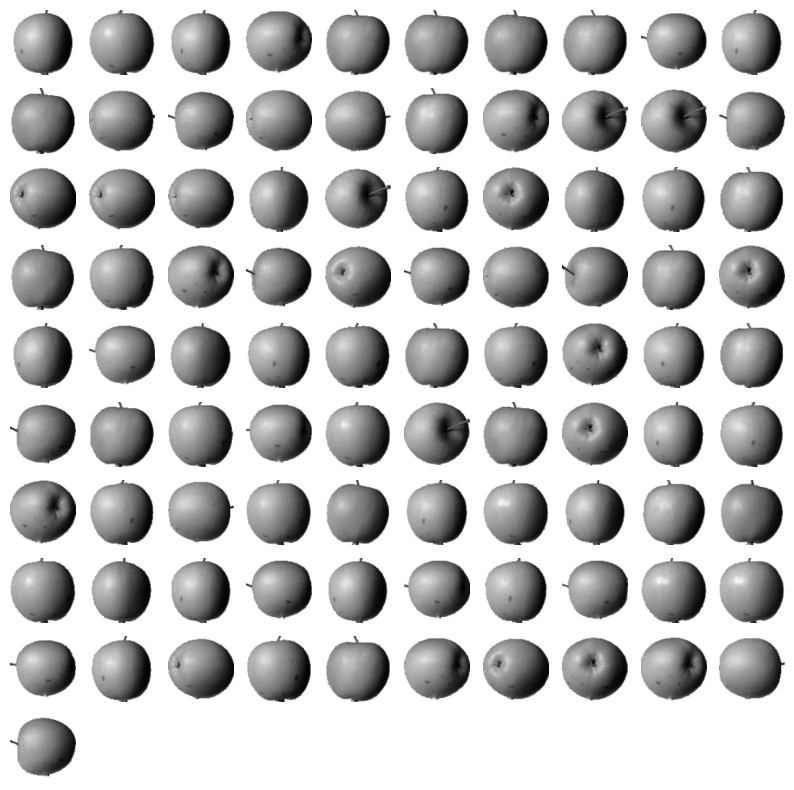

In [ ]:
for label in range(0,3):
  draw_fruits(fruits[km.labels_ == label])
  print("\n")

훈련 데이터의 차원을 줄이면 또 하나 얻을 수 있는 장점은 시각화다. 3개 이하로 차원을 줄이면 화면에 출력하기 비교적 쉽다.

fruits_pca 데이터는 2개의 특성이 있기 때문에 2차원으로 표현할 수 있다. 

* 앞에서 찾은 km.labels_ 를 사용해 클러스터별로 나누어 산점도를 그려보겠다.

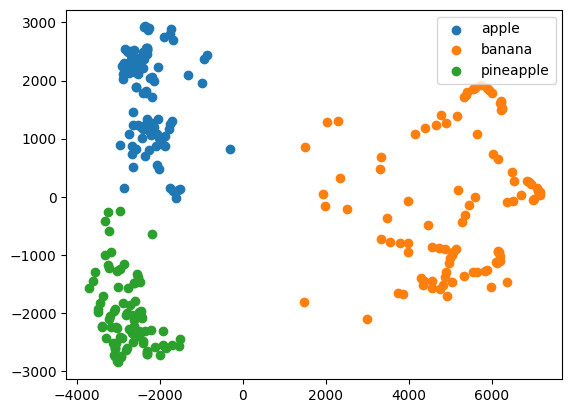

In [ ]:
for label in range(0,3):
  data = fruits_pca[km.labels_ == label]
  plt.scatter(data[:,0],data[:,1])
plt.legend(['apple','banana','pineapple'])
plt.show()